In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
image_path = r'./images/img_00002.jpg'
image = cv2.imread(image_path)

# cv2.imshow('Original Image', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [3]:
converted_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret3, th3 = cv2.threshold(converted_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
inverted_image = cv2.bitwise_not(th3)

# cv2.imshow('Inverted Image', inverted_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [4]:
dilated_image = cv2.dilate(inverted_image, np.ones((2, 2), np.uint8), iterations=1)
# cv2.imshow('Dilated Image', dilated_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [5]:
contours, hierarchy = cv2.findContours(dilated_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


letters = []
for idx, contour in enumerate(contours):
    (x, y, w, h) = cv2.boundingRect(contour)
    
    print(hierarchy[0][idx])
    if hierarchy[0][idx][3] != None:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        # cv2.imshow('character', image)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()

[ 1 -1 -1 -1]
[ 2  0 -1 -1]
[ 3  1 -1 -1]
[ 4  2 -1 -1]
[ 5  3 -1 -1]
[ 6  4 -1 -1]
[ 7  5 -1 -1]
[ 8  6 -1 -1]
[-1  7 -1 -1]


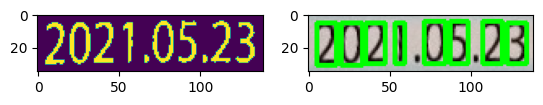

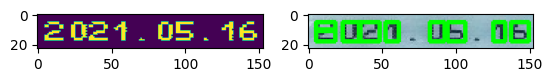

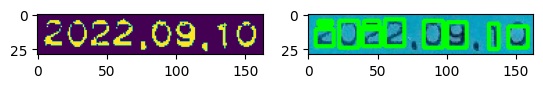

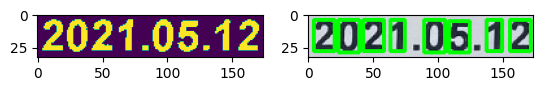

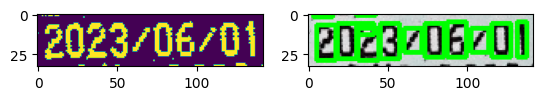

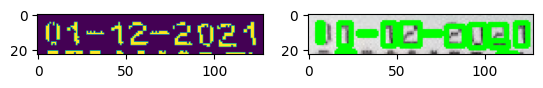

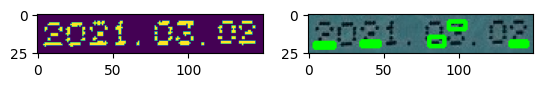

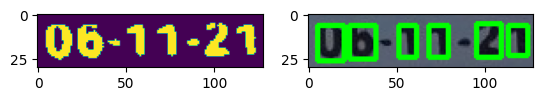

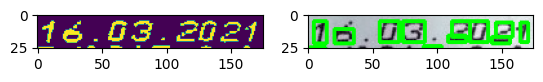

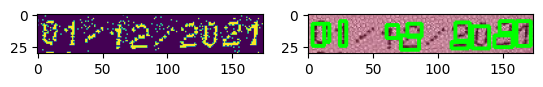

In [ ]:
DATASET_PATH = r'./images/'

images = os.listdir(DATASET_PATH)

number = 0
for image in images:
    image_path = os.path.join(DATASET_PATH, image)
    
    original_image = cv2.imread(image_path)
    
    image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    ret3, th3 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    image = cv2.bitwise_not(th3)
    
    # image = cv2.dilate(image, np.ones((2, 2), np.uint8), iterations=1)
    
    
    contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


    letters = []
    for idx, contour in enumerate(contours):
        (x, y, w, h) = cv2.boundingRect(contour)

        if hierarchy[0][idx][3] != None:
            
            if w < 10 and h < 10:
                continue
            cv2.rectangle(original_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            
            
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    
    plt.subplot(1, 2, 2)
    plt.imshow(original_image)
    plt.show()
    
    number += 1
    
    if number == 10:
        break